# EDA - Mobile-Driven Purchase Behavior Analysis 1

_An exploratory data analysis (EDA) focused on identifying user behavior patterns related to mobile purchasing, buyer confidence, demographics, impulsive buying influenced by discounts, and the synchronization between mobile usage habits and online shopping activity._

<div style="background-color:#cdcdcd;color:black;">

## 2. Hipótesis

</div>

- **Confianza del comprador** // Dataset 2<br>
Los usuarios que compran desde el móvil previamente han comprado desde Desktop

- **Confianza del comprador** // Dataset 2<br>
Hay relación entre plazos de entrega previos y la repetición de compra?

- **Perfil** // Dataset 2<br>
Hay diferencias de género o edad entre los compradores 'mobile' recurrentes?

- **Oferta** // Dataset 2<br>
Hay categorías de producto que destaquen para la primera compra móvil?

- **Compras impulsivas** // Dataset 2<br>
Tienen más efecto los descuentos en las compras móviles que en las Desktop?

- **Sincronía horaria de uso y compra** // Datasets 1 y 2 <br>
  ¿Se solapan las horas de mayor actividad en el móvil con las horas pico de compra online?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [4]:
# Cargo el CSV del Dataset 2 limpio.
df_2c = pd.read_csv('..\data\cleaned_ecommerce.csv')
df_2c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51282 entries, 0 to 51281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date           51282 non-null  object 
 1   time                 51282 non-null  object 
 2   aging                51282 non-null  float64
 3   customer_id          51282 non-null  int64  
 4   gender               51282 non-null  object 
 5   device_type          51282 non-null  object 
 6   customer_login_type  51282 non-null  object 
 7   product_category     51282 non-null  object 
 8   product              51282 non-null  object 
 9   sales                51282 non-null  float64
 10  quantity             51282 non-null  float64
 11  discount             51282 non-null  float64
 12  profit               51282 non-null  float64
 13  shipping_cost        51282 non-null  float64
 14  order_priority       51282 non-null  object 
 15  payment_method       51282 non-null 

In [5]:
# Convierto a category algunas de las columnas object para que podamos trabajar mejor con ellas

# Columnas categóricas en df_2
cat_cols_df2 = ['gender', 'device_type', 'customer_login_type', 'product_category', 'order_priority', 'payment_method']

# Función para limpiar valores de texto/categoría   
def limpiar_categorias(df, columnas):
    for col in columnas:
        if df[col].dtype.name in ['object', 'category']:
            df[col] = df[col].str.strip().str.lower() # al aplicarle métodos de string se convierte en tipo object
            df[col] = df[col].astype('category') # volvemos a convertir a category (no es lo óptimo) :-/
    return df

# Aplicamos al dataframe
df_2c = limpiar_categorias(df_2c, cat_cols_df2)
df_2c.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51282 entries, 0 to 51281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   order_date           51282 non-null  object  
 1   time                 51282 non-null  object  
 2   aging                51282 non-null  float64 
 3   customer_id          51282 non-null  int64   
 4   gender               51282 non-null  category
 5   device_type          51282 non-null  category
 6   customer_login_type  51282 non-null  category
 7   product_category     51282 non-null  category
 8   product              51282 non-null  object  
 9   sales                51282 non-null  float64 
 10  quantity             51282 non-null  float64 
 11  discount             51282 non-null  float64 
 12  profit               51282 non-null  float64 
 13  shipping_cost        51282 non-null  float64 
 14  order_priority       51282 non-null  category
 15  payment_method     

<div style="background-color:#cdcdcd;color:black;">

## 5. Análisis específico de las Hipótesis
</div>

<div style="background-color:#909090;color:black;">

### Hipótesis 2. Perfil
#### Hay diferencias de género entre los compradores 'mobile' recurrentes?
</div>

Considerando los usuarios que compran recurrentemente a través del móvil, esta hipótesis se plantea que pueden observarse patrones distintos según el género.

Analizar las diferencias puede ayudar a identificar segmenetos de clientes más propensos a utilizar el canal móvil de manera habitual, lo que permitirá adaptar las estrategias de marketing y personalización para maximizar la conversión en este perfil de usuario.

Para verificar esta hipótesis es necesario dar los siguientes pasos:
1. Obtener un dataframe con los usuarios recurrentes del canal móvil
2. Hacer un análisis general considerando el género para usuarios mobile recurrentes
2. Comprobar si se observan patrones que permitan segmentar a los usuarios

El resultado esperado es que las mujeres repitan compra en mayor medida que los hombres, visto que la categoría con mayor volumen de compras es 'fashion'.

#### 2.1. Obtener un dataframe con los usuarios recurrentes del canal móvil

In [8]:
df_2c

,order_date,time,aging,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method
0,2018-01-02,10:56:33,8.0,37077,female,web,member,auto & accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,female,web,member,auto & accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,female,web,member,auto & accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,female,web,member,auto & accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,high,credit_card
4,2018-08-13,21:18:39,9.0,53639,female,web,member,auto & accessories,Tyre,250.0,1.0,0.3,160.0,16.0,critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51277,2018-02-28,22:59:50,6.0,78489,female,mobile,member,home & furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,medium,money_order
51278,2018-02-28,13:19:25,2.0,91941,female,mobile,member,home & furniture,Umbrellas,70.0,5.0,0.2,14.0,1.4,medium,credit_card
51279,2018-02-28,10:25:07,6.0,63313,male,web,member,home & furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,medium,credit_card
51280,2018-02-28,10:50:08,7.0,86485,male,web,member,home & furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,medium,credit_card


In [16]:
# Filtra solo compras hechas desde móvil
df_mobile = df_2c[df_2c['device_type'] == 'mobile']
print(len(df_mobile))

# Cuenta el número de compras por usuario en móvil
compras_mobile = df_mobile.groupby('customer_id').size().reset_index(name='compras_mobile')
print(len(compras_mobile))

# Selecciona solo los usuarios con más de una compra en móvil (recurrentes)
usuarios_recurrentes = compras_mobile[compras_mobile['compras_mobile'] > 1]
print(len(usuarios_recurrentes))

# Únelos con el DataFrame original para recuperar info de género
df_recurrentes_mobile = df_mobile[df_mobile['customer_id'].isin(usuarios_recurrentes['customer_id'])]
print(len(df_recurrentes_mobile))

3658
3557
97
198


### 2.2. Análisis general según género y edad para usuarios mobile recurrentes

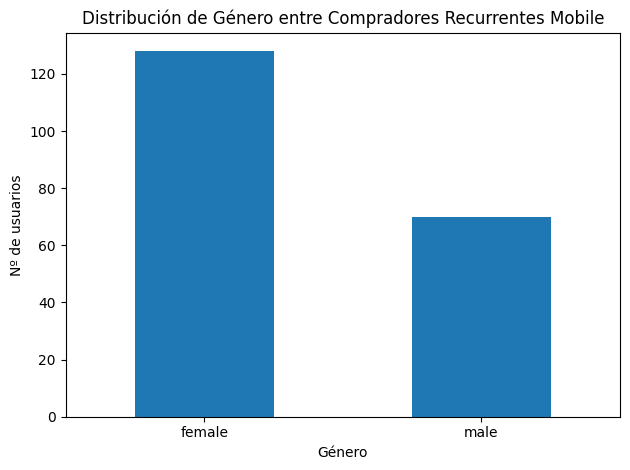

In [21]:
# Gráfico de barras por género para usuarios recurrentes en móvil

df_recurrentes_mobile['gender'].value_counts().plot(kind='bar', color='C0')

plt.title('Distribución de Género entre Compradores Recurrentes Mobile')
plt.xlabel('Género')
plt.ylabel('Nº de usuarios')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 2.3. Calcular el porcentaje de casos que cumplen la hipótesis

In [26]:
################### RESULTADO DE LA HIPÓTESIS ###################

# Total de usuarios recurrentes en móvil
total_recurrentes = len(df_recurrentes_mobile['customer_id'].unique())

# Número de recurrentes por género
genero_counts = df_recurrentes_mobile.groupby('gender')['customer_id'].nunique()

# Porcentaje por género
porcentajes = (genero_counts / total_recurrentes * 100).round(2)

print("Porcentaje de usuarios recurrentes en móvil por género:")
print(porcentajes)


Porcentaje de usuarios recurrentes en móvil por género:
gender
female    78.35
male      50.52
Name: customer_id, dtype: float64


C:\Users\xabi\AppData\Local\Temp\ipykernel_15916\3377792800.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genero_counts = df_recurrentes_mobile.groupby('gender')['customer_id'].nunique()
